# RESEARCH QUESTIONS

## [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [5]:
INSTAGRAM_PROFILE_PATH = 'data/instagram_profiles.csv.zip'
INSTAGRAM_POSTS_PATH = 'data/instagram_posts.csv.zip'
INSTAGRAM_LOCATIONS_PATH = 'data/instagram_locations.csv.zip'


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
data_profiles = pd.read_csv(INSTAGRAM_PROFILE_PATH, delimiter='\t')

In [7]:
data_profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [4]:
data_profiles.profile_id.dropna(inplace = True)
data_profiles.is_business_account.fillna(False, inplace=True)
data_profiles = data_profiles.fillna(0)
data_profiles.isna().sum()

sid                    0
profile_id             0
profile_name           0
firstname_lastname     0
description            0
following              0
followers              0
n_posts                0
url                    0
cts                    0
is_business_account    0
dtype: int64

## [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

#### - Plot the number of posts for each profile in descending order.

ValueError: x and y must be the same size

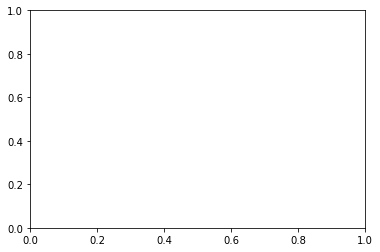

In [11]:
post_sort = data_profiles.sort_values(by = 'n_posts', ascending = False)
confronto_prof = post_sort[['profile_name','n_posts']]
confronto_prof.head(10)

plt.scatter(post_sort[['n_posts']],len(post_sort[['profile_name']]))
plt.show()

#### - What posts have the highest number of "likes"?

In [4]:
data_posts = pd.read_csv(INSTAGRAM_POSTS_PATH,usecols = ['post_id','description','numbr_likes','number_comments'], delimiter='\t', nrows = 2000000)
likes_sort = data_posts.sort_values(by = 'numbr_likes', ascending = False)
confronto_post = likes_sort[['post_id','description','numbr_likes']]
confronto_post.head(10)

#top_rows = []
#for chunk in pd.read_csv('instagram_posts.csv.zip',usecols = ['post_id','description','numbr_likes','number_comments'], 
#                         delimiter='\t', chunksize=500000):
#    chunk_top = chunk.sort_values(by='numbr_likes', ascending=False).head(5)
#    top_rows.append(chunk_top)

ParserError: Error tokenizing data. C error: out of memory

#### - What posts have the most and the least number of comments?

In [7]:
comments_up_sort = data_posts.sort_values(by = 'number_comments', ascending = False)
comments_down_sort = data_posts.sort_values(by = 'number_comments', ascending = True)

confronto_comments_up = (comments_up_sort[['post_id','description','number_comments']].head(10)).style.set_caption('posts with the most comments')
confronto_comments_down = (comments_down_sort[['post_id','description','number_comments']].head(10)).style.set_caption('posts with the least comments')

display(confronto_comments_up)
display(confronto_comments_down)

,post_id,description,number_comments
242837,BQ_N0bzhTSL,🍔🍟❤️,135221
1228385,BT29eW-BHMn,صباح الخير يا مدلل 🕊,116551
1758104,BLWvTOwhChG,السحب على مجوهرات كارتيه ، هدايا عربون الحب مني لكل شخص وقف عند البوتيك وعبر عن رايه الجميل بالعطر .. حيكون يوم الاحد ب بـ اذن الله .. تابعونا يومها ع السناب تشات 💪🏽✨,70722
579112,BmORc4znzzA,Party in the castle with @benefitcosmetics 🎉 \n_____________\nFiesta en el castillo 🎉😍 #MarialeNoPara,56686
313806,BxrapKyCgg0,Склав присягу.,53878
377722,Bbz6IBXhKgg,"Спасибо вам за все! Всех обнял! Я дома, все норм ;) 🙏🏾🙌🏾",32505
50077,BuvfTmgFsuY,"COMPETITION CLOSED. The winner is @abbie__williams! #MobFridayGiveaway.🍾🍋🍏 HUGE @fentimansltd giveaway - a massive gin and tonic prize up for grabs. To win this huge array Gin and Fentiman's flavoured mixers, just:\n1. Tag your mates who love a g and t! Each new tagged friend counts as a new entry so go wilddddddddd.\n2. Follow @mobkitchenuk 🍾\n3. Follow @fentimansltd 🍋\nYou’ve gotta be over 18 for this one folks. Winner decided Monday. Good luck. #MobKitchen#competition #giveaway #prize #fentimans",31655
1319985,BtERQw2ALrk,Yeni kaplanım “Cesur” 🐯,29662
1188069,BaO_mhzlyeI,New security / nueva seguridad 😍,29361
712304,Bq-INRTlPhO,Cheguei em Muzumuia com a melhor recepção de todas! Mais um ano aprendendo sobre o Amor! ❤🙏 @fraternidadesemfronteiras @andreimoreira,26386


,post_id,description,number_comments
0,BXdjjUlgcgq,Wreckloose! Deevalley bike park laps on the @intensecycles recluse!\n@alfjonescycles \n@saddleback_ltd \n#deevalleybikepark #northwalestrails #ridemoremtb #recluse #bikes #cycling #mtb #bikepark #gopro,0
1575589,BdAXok1FarK,🍁,0
722848,ByH2o2EBgeX,Love reexploring this beautiful and historic city all these years later. The intersection of history and modernity is an incredible thing to experience. \n#doctorsofinstagram #somedocs @somedocs,0
722849,ByHz1JXIiNA,Barcelona\n#aidamomente #aida#aidanova,0
722850,ByHoBcjnOyU,스페인 바로셀로나 1 #스페인 #바로셀로나 #spain #barcelona,0
722851,ByHlpcdJwJG,nan,0
722852,ByGrDNuCLtM,nan,0
722854,ByGg0EfD8oF,"Откуда у тебя вообще убеждение, что бывают «другие разы»? «Раз» – это по определению что-то одно. А второго раза, второго шанса даже в сказках не бывает. Это будет уже совсем другая сказка, если будет вообще!",0
722856,ByGYU0RpoM6,nan,0
722858,ByGIP_lCWpl,nan,0


#### - How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

#### - How many posts include only photos? How many also have videos?

In [29]:
print('{} posts include only photos'.format(sum(data_posts['post_type'] == 1)))
print('{} posts include both photos and videos'.format(sum(data_posts['post_type'] == 3)))

940326 posts include only photos
3 posts include both photos and videos


#### - What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [67]:
n = len(data_profiles)

print('{0:.2%} of accounts are business accounts'.format((sum(data_profiles['is_business_account'] == True)/n)))
print('{0:.2%} of accounts are non-business accounts'.format((sum(data_profiles['is_business_account'] == False)/n)))

18.97% of accounts are business accounts
81.03% of accounts are non-business accounts


We see how the vast majority of instagram accounts analyzed are non-business accounts (81.03%). The purpose of business acccounts is that of gaining access to promote posts and statistics about your followers, this gives us reason to believe that the majority of instagram users isn't interested in growing a following for monetary reasons, opposed to just having a profile to share their personal life.

## [RQ3] Now it's important to understand the most common times in which users publish their posts. 

#### - What is the most common time in which users publish their posts?

#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

**Initial time 	Final time**  
**06:00:00 	10:59:59**  
**14:00:00 	16:59:59**  
**20:00:00 	23:59:59**  
**00:00:00 	02:59:59**  
**03:00:00 	05:59:59**  

## [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

#### - Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

#### - Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

#### - What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

#### - Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

## [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

#### - Plot the top 10 most popular users in terms of followers and their number of posts.

#### - Who is the most influential user?

#### - Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

#### - How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

#### - How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

## [RQ6] It's time to get information from the user posting effectiveness.

#### - What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

#### - Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

#### - What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

#### - Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

#### - Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

#### - Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

#### - What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

#### - What are histograms, bar plots, scatterplots and pie charts used for?

#### - What insights can you extract from a Box Plot?

## Bonus points

Up to this point, you probably have worked with one or two files simultaneously. Nevertheless, for the literals a. and b. of this section, you must work with the three datasets at the same time. Note that performing some of these operations might be too complex for your pc specs. For this reason, we suggest you make use of AWS (yeah! only a suggestion). In case you need it, in the following links you can find the same three files already mounted into AWS for you to work with them easily (instagram_posts, instagram_profiles, instagram_locations).

#### a. Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

#### b. Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

#### c. Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

# Command Line Question

Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also does not use as much CPU processing time as other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

In this question, you should use command line tools such as grep and possibly other commands to answer the following question:

#### Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)

Note: You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable.
Algorithmic Question

# ALGORITHMIC QUESTION

## [AQ1] Given the following pseudocode, answer the questions:

Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)

#### - What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

#### - What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

#### - Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

## [AQ2] Considering the following problem, answer the questions:

Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

Each piece of the cut should have an integer length
He should at least cut the ribbon once
The multiplication of the length of all the pieces be the maximum possible

#### 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

#### 2. Show that the algorithm has exponential running time.

#### 3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

#### 4.Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it(if you have implemented two algorithms, please include both in the plot and compare them).

#### 5. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.